In [1]:
%%javascript
IPython.load_extensions('IPython-notebook-extensions-master/usability/python-markdown')
IPython.load_extensions('IPython-notebook-extensions-master/usability/hide_input')
IPython.load_extensions('IPython-notebook-extensions-master/usability/hide_input_all')

<IPython.core.display.Javascript object>

In [ ]:
%pylab inline
import imp
import pandas as pd
import pandasql

<span style="color:orange">Analyzing the NYC Subway Dataset</span>
====

<span style="color:gray">Short Questions</span>
---

### <span style="color:blue">Section 1. Statistical Test</span>

#### 1.1 Which statistical test did you use to analyse the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

The Mann-Whitney U test was used on the mean number of entries per hour on rainy and non-rainy days for the subway data. The null hypothesis was that the probability of a randomly chosen value from the distribution for the number of entries per hour on non-rainy days being greater than a randomly chosen value from the distribution for the number of entries per hour on rainy days was equal to 0.5. Since this is an equality condition, a two sided test should be used. The p-critical value was assumed to be 0.05.

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

The Mann-Whitney U test is a nonparametric test meaning that it assumes nothing about the shape of distribution, so it is applicable to any distribution. Since the entries per hour data is not close to normally or t-distributed, tests assuming those types of distributions are not applicable. The entries per hour data may follow another type of distribution well enough that another test specific to that type of distribution might be more appropriate, but that was not investigated.

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

In [26]:
mw_turnstile = imp.load_source('MannWhitney_rainy_notrainy','./Analysis/MannWhitney_rainy_notrainy.py')

# original version of data
(with_rain_mean_o, without_rain_mean_o, U_o, p_o) = mw_turnstile.mann_whitney_plus_means(version=1)
p_o = 2.0*p_o

# improved version of data
(with_rain_mean_i, without_rain_mean_i, U_i, p_i) = mw_turnstile.mann_whitney_plus_means(version=2)
p_i = 2.0*p_i

The data set used by the Udacity grader will subsequently be referred to the original data set and the other data set will be referred to as the secondary data set. For the original data set, the p-value is just under 0.05 and the means are about 1105 with rain and 1090 without rain. For the secondary data set, the p-value is about 5.5 X 10<sup>-6</sup> and the means are about 2028 with rain and 1845 without rain.

<br><br><br>
#### 1.4 What is the significance and interpretation of these results?

The p-value from the Mann-Whitney test for the original data set is below the 5% significance level and the null hypothesis is rejected, although just barely. The means are also fairly close together. For the improved data set the p-value is very small and the means are further apart which gives more confidence that ridership is affected by rain, however the secondary data set only has data every 4 hours instead of every 1 hour in the original data set. It can only be said that ridership increases on rainy days during those 6 hours of the day contained in the secondary data set.

### <span style="color:blue">Section 2. Linear Regression</span>

In [ ]:
lr = imp.load_source('linear_regression_OLS','./Analysis/linear_regression_OLS.py')

#original version of data
(prediction, coeff, residuals, r_squared, df) = lr.predictions()
print r_squared

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:

For the questions below statsmodel.regression.linear_model.OLS was used. This solves for the coefficients ($\theta$) by finding the location where all of the derivatives of the sum of squared residuals for each coefficient are equal to 0. The solution is $\theta = \left(F^T F\right)^{-1} F^T E$, where $F$ is a matrix of the feature vectors and $E$ is the vector of the number of entries per hour.

#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

#### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.

The following is the answer for both 2.2 and 2.3.

Only the original data set is discussed since it contains data for all hours and the number of entries per hour is a strong function of the hour as shown Figure 1 below. 

##### <span style="color:green">Location: Dummy variables</span>

Dummy variables were used for the units. The model contained a term for each unit that was a non-zero constant when UNIT was equal to that unit and zero when UNIT was equal to any other unit. This modeled the effect of location.

##### <span style="color:green">Time</span>

Next, the effect of time was considered. Unfortunately, the number of entries per hour is a nonlinear function of the hour (Figure 1). It would probably be best fit by a set of sine functions, but linear regression could not be used for that. Using a polynomial increases R<sup>2</sup> somewhat as shown in Figure 2 below. A transformation of the hour followed by a polynomial fit increases R<sup>2</sup> such that a second order polynomial fit to the transformed hour has a larger R<sup>2</sup> than a seventh order polynomial fit to the hour. The transformation is a reordering of the hour such that 0 is assigned to the hour with the lowest average number of entries for all units, 1 is assigned to the hour with the second lowest average number of entries for all units, etc. The number of entries per hour is then generally an increasing function of this reordered hour instead of an oscillatory function of the hour and a low order polynomial can then be used for the relationship between the reordered hour and the number of entries per hour. See Figure 1. R<sup>2</sup> using the reordered hour did not increase much beyond a polynomial order of 2 as shown in Figure 2.

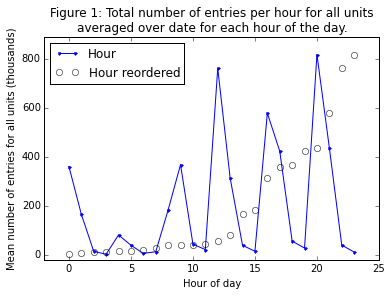

In [5]:
nephm = pd.read_csv('../data/hour_sorted.csv')

plt.plot(nephm.hour,nephm.avgentriesperhr/1000.0,'.-',label='Hour')
plt.plot(nephm.hoursorted,nephm.avgentriesperhr/1000.0,'o',mfc='none',label='Hour reordered')
plt.title('Figure 1: Total number of entries per hour for all units \naveraged over date for each hour of the day.')
plt.xlabel('Hour of day')
plt.xlim(-2,25)
plt.ylabel('Mean number of entries for all units (thousands)')
plt.ylim(-20,890)
plt.legend(loc='upper left')
plt.show()

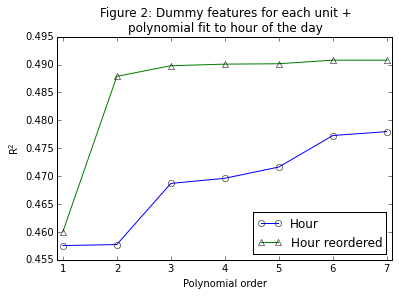

In [6]:
order = range(1,8)
rsq = [0.45754816539,0.457731170793,0.468686449749,0.469607374447,0.471629171463,0.477272927786,0.477969417649]
rsq_tr = [0.460010494765,0.487874455357,0.48978150607,0.490065421811,0.490137367505,0.490775784014,0.490764099612]

plt.plot(order,rsq,'o-',mfc='None',label='Hour')
plt.plot(order,rsq_tr,'^-',mfc='None',label='Hour reordered')
plt.title('Figure 2: Dummy features for each unit + \npolynomial fit to hour of the day')
plt.xlabel('Polynomial order')
plt.xlim(0.9,7.1)
plt.xticks(order,['1','2','3','4','5','6','7'])
plt.ylabel('R$^\mathdefault{2}$')
plt.legend(loc='lower right')
plt.show()

The other time variable that may be important is the day of the week or the weekday variable which is 1 on week days and 0 on weekend days. The original data set did not contain these, but they were calculated from the dates. Figure 3 below shows the total number of entries for all units averaged over date for each day of the week. Based on this, it appears that using a polynomial might be alright without having to reorder as was done with the hour. This also shows that Figure 4 shows the R<sup>2</sup> values when using polynomial features for the day of the week, the day of the week reordered, and the weekday variable. Just using the weekday variable is almost as good as using a second order polynomial for the day of the week reordered.

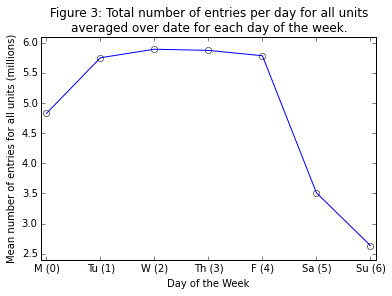

In [7]:
nepdm = pd.read_csv('../data/avgentriesperday.csv')

plt.plot(nepdm.dayofweek,nepdm.avgentriesperday/1.0e6,'o-',mfc='None')
plt.title('Figure 3: Total number of entries per day for all units \naveraged over date for each day of the week.')
plt.xlabel('Day of the Week')
plt.xlim(-0.1,6.1)
plt.xticks(range(7),['M (0)','Tu (1)','W (2)','Th (3)','F (4)','Sa (5)','Su (6)'])
plt.ylabel('Mean number of entries for all units (millions)')
plt.ylim(2.4,6.1)
plt.show()

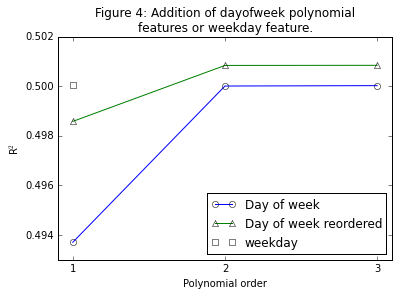

In [8]:
order = range(1,4)
rsq = [0.493706702569,0.500006813553,0.500023123372]
rsq_tr = [0.498580487824,0.500837524245,0.50084193156]

plt.plot(order,rsq,'o-',mfc='None',label='Day of week')
plt.plot(order,rsq_tr,'^-',mfc='None',label='Day of week reordered')
plt.plot(1,0.500044875193,'s',mfc='None',label='weekday')
plt.title('Figure 4: Addition of dayofweek polynomial \nfeatures or weekday feature.')
plt.xlabel('Polynomial order')
plt.xlim(0.9,3.1)
plt.xticks(order,['1','2','3'])
plt.ylabel('R$^\mathrm{2}$')
plt.ylim(0.493,0.502)
plt.legend(loc='lower right')
plt.show()

Another way to deal with time would be to just use the hour of the week instead of the hour of the day and the day. Figure 5 shows the total number of entries per hour for all units averaged over date for each hour of the week and the sorted version.

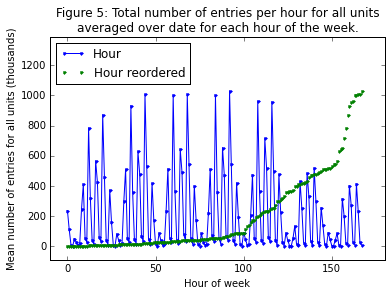

In [9]:
nephwm = pd.read_csv('../data/hourofweek_sorted.csv')

plt.plot(nephwm.hourofweek,nephwm.avgentries/1000.0,'.-',label='Hour')
plt.plot(nephwm.hourofweek_sorted,nephwm.avgentries/1000.0,'.',label='Hour reordered')
plt.title('Figure 5: Total number of entries per hour for all units \naveraged over date for each hour of the week.')
plt.xlabel('Hour of week')
plt.xlim(-10,180)
plt.ylabel('Mean number of entries for all units (thousands)')
plt.ylim(-90,1390)
plt.legend(loc='upper left')
plt.show()

Figure 6 shows even using just a second order polynomial gives a higher R<sup>2</sup> value than using any combination of polynomial functions of reordered hour of the day + day of the week or weekday. This is likely due to the fact that using hour of the day + day of the week or weekday does not do a good job accounting for different patterns of ridership as a function of hour on different days, particulary weekends. A third order polynomial in the reordered hour of the week was used to model the effect of time on the number of entries per hour.

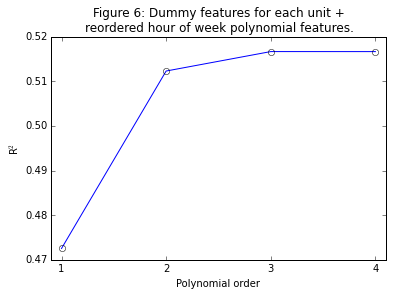

In [10]:
order = range(1,5)
rsq_tr = [0.472537764386,0.512288601737,0.516645115457,0.516638635686]

plt.plot(order,rsq_tr,'o-',mfc='None')
plt.title('Figure 6: Dummy features for each unit + \nreordered hour of week polynomial features.')
plt.xlabel('Polynomial order')
plt.xlim(0.9,4.1)
plt.xticks(order,['1','2','3','4'])
plt.ylabel('R$^\mathrm{2}$')
plt.show()

<br><br><br>
##### <span style="color:green">Precipitation</span>

In the original data set there are three variables that could be used to model the effect of precipitation on the number of entries per hour: 1) rain which is 1 if it rained that day at that location and 0 otherwise, 2) fog which is 1 if it was foggy at that time and location and 0 otherwise, and 3) precipi which is the amount of precipitation at that time and location. The R<sup>2</sup> values for adding various combinations of precipitation related features are shown below.

|                Precipitation Features            | R<sup>2</sup>                  |
|--------------------------------------------------|--------------------------------|
|no precipitation features                         | 0.516645                       |
|rain                                              | 0.516708                       |
|precipi                                           | 0.516644                       |
|fog                                               | 0.516690                       |
|precipi, precipi<sup>2</sup>                      | 0.516786                       |
|precipi, precipi<sup>2</sup>, precipi<sup>3</sup> | 0.516829                       |
|rain, fog                                         | 0.516798                       |
|rain, fog, precipi                                | 0.516824                       |
|rain, fog, precipi, precipi<sup>2</sup>           | 0.516808                       |


There was little increase in R<sup>2</sup> (on the order of 10<sup>-5</sup> to 10<sup>-4</sup>) when adding precipitation related features in a linear model, therefore they were not included.

##### <span style="color:green">Temperature</span>

In the original data set there are variables for the mean, minimum, and maximum temperature for the day at a location (meantempi, mintempi, and maxtempi). The effect of using temperature features is shown below where meantempi is abbreviated as Tm, mintempi is abbreviated as Tmin, and maxtempi is abbreviated as Tmax.
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

|               Temperature Features                                                  | R<sup>2</sup>  |
|-------------------------------------------------------------------------------------|----------------|
|no temperature features                                                              | 0.516645       |
|Tm                                                                                   | 0.517049       |
|Tmin                                                                                 | 0.517034       |
|Tmax                                                                                 | 0.517009       |
|Tm, Tm<sup>2</sup>                                                                   | 0.517267       |
|Tm, Tm<sup>2</sup>, Tm<sup>3</sup>                                                   | 0.517619       |
|Tm, Tm<sup>2</sup>, Tm<sup>3</sup>, Tm<sup>4</sup>                                   | 0.518162       |
|Tm, Tm<sup>2</sup>, Tm<sup>3</sup>, Tm<sup>4</sup>, Tm<sup>5</sup>                   | 0.518073       |
|Tm + Tmin                                                                            | 0.517032       |
|Tm + Tmax                                                                            | 0.517059       |

The minimum, maximum, and mean temperatures are correlated, so it is expected that using more than one of them will have little effect. This can be seen in the table. The mean temperature increased R<sup>2</sup> more than the minimum or maximum did. Polynomial terms for the mean temperature were considered and R<sup>2</sup> increased up to a fourth order polynomial. The increase was relatively small even for the fourth order polynomial, but was an order of magnitude greater than for precipitation features. Mean temperature polynomial terms up to fourth order were used as features. This could of course be overfitting, but that was not investigated.

##### <span style="color:green">Other weather variables</span>

The other variables in the original data set related to weather are pressure, dew point, wind speed, and thunder. The thunder variable is always 0 in the data set, so it could not be used. Only the mean pressure, mean dew point, and wind speed were considered. The R<sup>2</sup> values are shown below.

|               Other Weather Features                                                | R<sup>2</sup>  |
|-------------------------------------------------------------------------------------|----------------|
|no other features                                                                    | 0.516645       |
|meanpressurei                                                                        | 0.516685       |
|meandewpti                                                                           | 0.516851       |
|meanwindspdi                                                                         | 0.516701       |

These variables only increased R<sup>2</sup> on the order of 10<sup>-4</sup> or less, so they were not used.

<br><br>
##### <span style="color:green">Features used</span>

The features used were dummy variables for each unit, reordered hour of the week, reordered hour of the week squared, reordered hour of the week cubed, mean temperature, mean temperature squared, mean temperature cubed, and mean temperature to the fourth power. All features were normalized by subtracting their mean and dividing by their standard deviation.

#### 2.4 What are the coefficients (or weights) of the non-dummy features in your linear regression model?

The coefficients are shown in the following table.

|               Feature                                    | Coefficient    |
|----------------------------------------------------------|----------------|
|hr of week reordered                                      | 232.1132       |
|(hr of week reordered)<sup>2</sup>                        | -2099.677      |
|(hr of week reordered)<sup>3</sup>                        | 2593.422       |
|mean temperature                                          | 273706.9       |
|(mean temperature)<sup>2</sup>                            | -843000.3      |
|(mean temperature)<sup>3</sup>                            | 869494.3       |
|(mean temperature)<sup>4</sup>                            | -300232.3      |
|constant term                                             | 1097.463       |

#### 2.5 What is your model’s R<sup>2</sup> (coefficients of determination) value?

0.518073

#### 2.6 What does this R<sup>2</sup> value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R<sup>2</sup> value?

Since the R<sup>2</sup> value is low, the model will not be very good at predicting ridership.

Figure 7 is a histogram of the residuals for the fit. The top of the curve is not shown to emphasize the tails. The distribution of the residuals is right skewed; there are data points where the model gives a much lower number of entries per hour than the observed number of entries per hour. Figures 8 and 9 are plots of the residuals as a function of the hour of the week and the mean temperature. The residuals are distributed approximately the same for all temperatures, but not for all hours of the week. There are clearly certain hours where the model clearly does not do a good job of predicting the observed number of entries per hour. Figure 10 shows the mean residuals for each hour of the day on every day of the week. There are clearly under predictions with peaks at 10 am, 6 or 7 pm, and 10 pm on week days, and over predictions around 5 am and 4 pm on week days. There are also over predictions around 8 pm on Saturdays and 8 am on Sundays. These indicate that either a more complicated nonlinear model should be used for time such as a set of sine functions as mentioned earlier or that something is missing entirely from the model. One thing that is clearly missing is information about events in the area. There is likely a substantial increase in ridership before or after some events. That could explain the right skewed residual histogram.

A linear model is probably not the best approach even if a larger data set and data on events were included. Ridership is clearly a nonlinear function of time. The reordering that was done is a nonlinear operation used to make ridership approximately a polynomial function of time, but fitting to a nonlinear function would probably be better. It is also likely that the effects of time and weather are not separable; people likely respond to weather differently at different times. In that case, nonlinear functions that depend on both time and weather would be required. That appears to be the case for the rain variable (Figure 11), although there may be some anomaly on Mondays (hours 0-23) that would require further investigation.
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

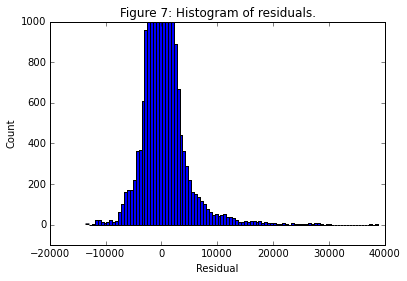

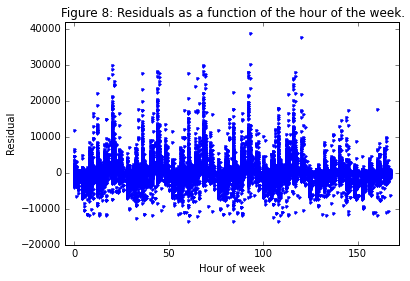

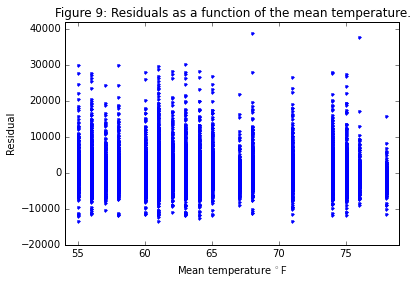

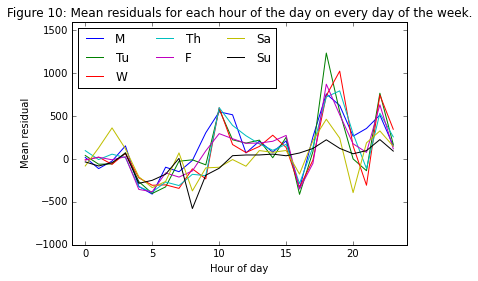

In [11]:
df['residuals'] = residuals
plt.hist(residuals,100)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.ylim(-100,1000)
plt.title('Figure 7: Histogram of residuals.')

plt.figure()
plt.plot(df.hourofweek,df.residuals,'.')
plt.xlabel('Hour of week')
plt.xlim(-5,172)
plt.ylabel('Residual')
plt.ylim(-20000,42000)
plt.title('Figure 8: Residuals as a function of the hour of the week.')

plt.figure()
plt.plot(df.meantempi,df.residuals,'.')
plt.xlabel('Mean temperature $\mathsf{^\circ F}$')
plt.xlim(54,79)
plt.ylabel('Residual')
plt.ylim(-20000,42000)
plt.title('Figure 9: Residuals as a function of the mean temperature.')

df2 = df[['hourofweek','residuals']]
q = """
SELECT hourofweek, AVG(residuals) AS meanresiduals
FROM df2
GROUP BY hourofweek
"""
df2 = pandasql.sqldf(q.lower(), locals())

plt.figure()
plt.plot(df2.hourofweek[0:24],df2.meanresiduals[0:24],label='M')
plt.plot(df2.hourofweek[24:48]-24,df2.meanresiduals[24:48],label='Tu')
plt.plot(df2.hourofweek[48:72]-48,df2.meanresiduals[48:72],label='W')
plt.plot(df2.hourofweek[72:96]-72,df2.meanresiduals[72:96],label='Th')
plt.plot(df2.hourofweek[96:120]-96,df2.meanresiduals[96:120],label='F')
plt.plot(df2.hourofweek[120:144]-120,df2.meanresiduals[120:144],label='Sa')
plt.plot(df2.hourofweek[144:168]-144,df2.meanresiduals[144:168],label='Su')
plt.legend(ncol=3,loc='upper left')
plt.xlabel('Hour of day')
plt.xlim(-1,24)
plt.ylabel('Mean residual')
plt.ylim(-1000,1600)
plt.title('Figure 10: Mean residuals for each hour of the day on every day of the week.')

plt.show()

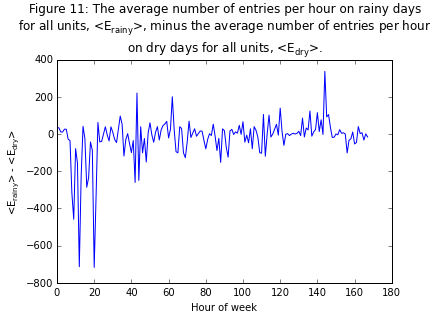

In [12]:
df2 = lr.rename_columns(df)
df3 = df2[['hourofweek','rain','entriesperhr']]

q = '''
SELECT hourofweek, AVG(entriesperhr) AS avgentriesperhr
FROM df3
WHERE rain == 0
GROUP BY hourofweek;
'''
df_dry = pandasql.sqldf(q.lower(), locals())

q = '''
SELECT hourofweek, AVG(entriesperhr) AS avgentriesperhr
FROM df3
WHERE rain == 1
GROUP BY hourofweek;
'''
df_rainy = pandasql.sqldf(q.lower(), locals())

plt.plot(df_dry.hourofweek,df_rainy.avgentriesperhr - df_dry.avgentriesperhr)
plt.title('Figure 11: The average number of entries per hour on rainy days \nfor all units, <E$_\mathdefault{rainy}$>, ' +
          'minus the average number of entries per hour \non dry days for all units, <E$_\mathdefault{dry}$>.')
plt.xlabel('Hour of week')
plt.ylabel('<E$_\mathdefault{rainy}$> - <E$_\mathdefault{dry}$>')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### <span style="color:blue">Section 3. Visualization

#### 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

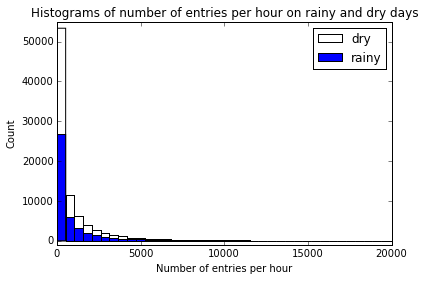

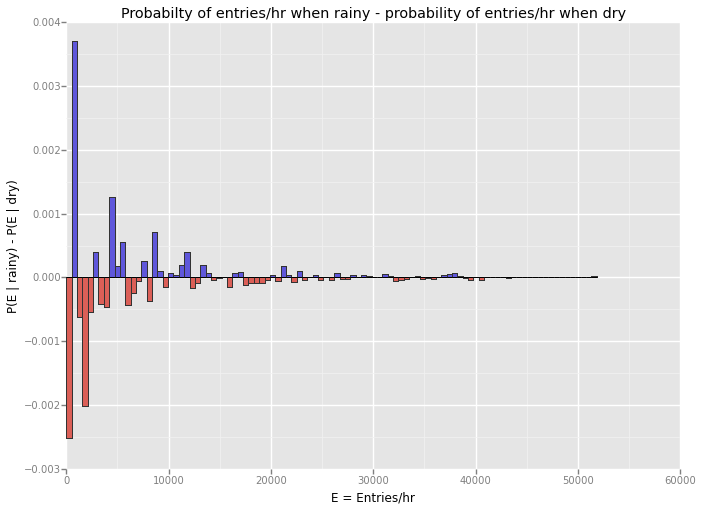

<ggplot: (8784245979329)>


In [13]:
rain_hist = imp.load_source('P_entriesperhr_given_rain_minus_P_entriesperhr_given_dry',\
                            './Visualization/P_entriesperhr_given_rain_minus_P_entriesperhr_given_dry.py')
plot = rain_hist.plot_weather_data(nbins=100)
print plot

Both of the plots above use the original data set. The first plot above shows that the distributions of the number of entries per hour are right skewed and that there were more days that were dry than rainy. Since it is not normalized, it is not useful for comparing the two distributions. The second plot above is a plot of the probability of the number of entries per hour on rainy days, P(E | rainy), minus the probability of the number of entries per hour on dry days, P(E | dry). This shows the difference in the distributions as a function of the number of entries per hour. It shows that rain affects the distribution of the number of entries per hour mostly for low numbers of entries per hour. The distribution of the number of entries per hour for numbers of entries per hour greater than about 12,000 is not affected much by rain. The pattern of lower ridership on rainy days for lower values of number of entries per hour followed by higher ridership on rainy days for slightly higher number of entries per hour is repeated several times which seems to indicate a shift to higher number of entries per hour due to rain. The repeating pattern is due to the fact that each unit has a different mean number of entries per hour. Dividing each value of the number of entries per hour by the mean for its unit might make things more clear.

#### 3.2 One visualization can be more freeform.

The following plot shows the total number of entries for all units averaged over date for each hour. Since the secondary data set only has data in 4 hour increments while the original data set has data in 1 hour increments, the original data set was used for this plot.

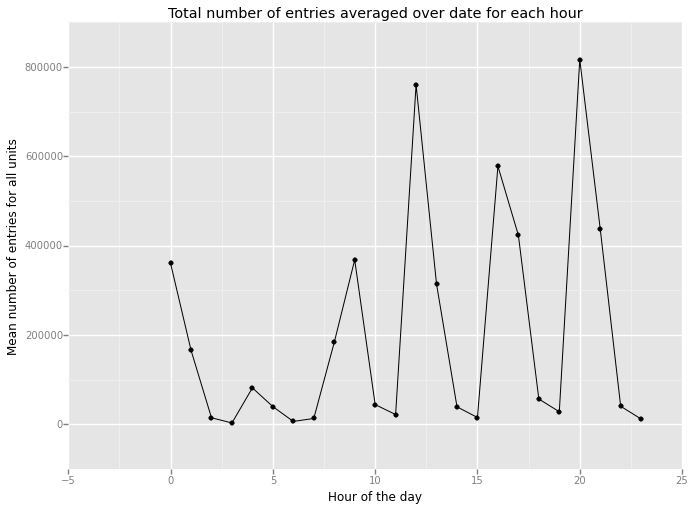

<ggplot: (8784245860277)>


In [25]:
nephm = imp.load_source('nentries_per_hour_mean','./Visualization/nentries_per_hour_mean.py')

# original data set
plot, avgentriesperhr = nephm.plot_weather_data(version=1)

# periods with number of entries > 100,000/hr
midnight_2am = np.sum(avgentriesperhr[0:2])
eight_10am = np.sum(avgentriesperhr[8:10])
noon_2pm = np.sum(avgentriesperhr[12:14])
four_6pm = np.sum(avgentriesperhr[16:18])
eight_10pm = np.sum(avgentriesperhr[20:22])

print plot

This shows that the times with entries above 100,000/hr are 8 pm to 10 pm (1,254,217 total) > 12 pm to 2 pm (1,074,129 total) >  4 pm to 6 pm (1,000,998 total) > 8 am to 10 am<br><br> (551,189 total) > 12 am to 2 am (525,893 total).

### <span style="color:blue">Section 4. Conclusion</span>

#### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?

For the original data set which has data for all hours of the day, there appears to be a slight increase in the number of people riding the NYC subway on rainy days compared to dry days. However, as shown in Figure 11 above, it also appears that the effect of rain on ridership may depend on time, although there is probably not enough data in this set to determine if the fluctuations are significant or due to noise or biases.

#### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

The Mann-Whitney U test showed that there was only a slightly significant increase in ridership on rainy days for the original data set. However, trying to just use the rain variable in linear regression had little effect on the R<sup>2</sup> value for the fit.

### <span style="color:blue">Section 5. Reflection</span>

#### 5.1 Please discuss potential shortcomings of the methods of your analysis

As discussed above, the effects of time on ridership are nonlinear. Although the nonlinear operation of sorting the hour of the week was used to make the number of entries per hour approximately a polynomial function of time, there were still patterns observed in the residuals as a function of hour of the week. A nonlinear fit might fix this, but this could also be due to the fact that there were no data for events in the area which likely cause spikes in the number of entries per hour. 

The effect of weather on the number of entries per hour is likely secondary to time and location, and based on this limited data set and a simple linear model does not appear to add much. Use of nonlinear functions of weather, time, and perhaps also position as well as a larger data set might improve things. 

The data set only covers a single month with a limited range of weather conditions. In order to predict ridership at any time, data for at least a month during each season would be needed. In addition, data about events in the area would be needed or ridership would be underpredicted for times around significant events.